In [1]:
cd ../src

/home/richard/Desktop/software/epicluster-results_upload/epicluster-results/src


In [2]:
import datetime
import random
import numpy as np
import pandas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import copy
import scipy.stats
import branchpro
import epicluster as ec

In [3]:
random.seed(123)
np.random.seed(123)

In [4]:
serial_interval = pd.read_csv("../data/raw/covid_serial_interval.csv")
w = serial_interval['w']

w = w[:14]
w = w / sum(w)

In [5]:
cases = pandas.read_csv('../data/covid/VIC.csv')
imp_cases = cases['Imported_Cases']

a = 1
b = 5

# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Incidence_Number']
    }
)

imp_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Imported_Cases']
    }
)

inference = branchpro.LocImpBranchProPosterior(
    inc_data=inc_data,
    imported_inc_data=imp_data,
    epsilon=1,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=0)
intervals0 = inference.get_intervals(central_prob=.9)

cases = cases['Incidence_Number']


past_cases = np.zeros(len(w))
forward_cases = copy.deepcopy(np.asarray(inc_data['Incidence Number']))
inf_cases = np.concatenate([past_cases, forward_cases])

imp_cases = np.asarray(imp_data['Incidence Number'])
imp_cases = np.concatenate([past_cases, imp_cases])


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5, imported_cases=imp_cases, epsilon=1.0)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.01, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/covid/results/VIC_R.csv')


results_vic = cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results

Iter=50, Rhat=11.48805146925414
Iter=100, Rhat=4.068786367534343
Iter=150, Rhat=2.0929044111382398
Iter=200, Rhat=1.7147444555145361
Iter=250, Rhat=1.8180524565171563
Iter=300, Rhat=1.4087905934551508
Iter=350, Rhat=1.0462940208296285
Iter=400, Rhat=1.1021555146818447
Iter=450, Rhat=1.2801532498472021
Iter=500, Rhat=1.0659677493680035
Iter=550, Rhat=1.0103961346132784
Iter=600, Rhat=1.021396389814034
Iter=650, Rhat=1.069959847213623
Iter=700, Rhat=1.058672740378366
Iter=750, Rhat=1.0404543968366833
Iter=800, Rhat=1.0141180782111263
Iter=850, Rhat=1.031539513421393
Iter=900, Rhat=1.021527776596966
Iter=950, Rhat=1.0235316063560496
Iter=1000, Rhat=1.0248186891521316
Iter=1050, Rhat=1.0200050651130486
Iter=1100, Rhat=1.0225685674902247
Iter=1150, Rhat=1.0361368882539832
Iter=1200, Rhat=1.0360461375962406
Iter=1250, Rhat=1.0282752178676322
Iter=1300, Rhat=1.030310570465682
Iter=1350, Rhat=1.0347002886694534
Iter=1400, Rhat=1.1061934472721981
Iter=1450, Rhat=1.0969126889814984
Iter=1500, Rh

In [6]:
cases = pandas.read_csv('../data/covid/QLD.csv')
imp_cases = cases['Imported_Cases']

a = 1
b = 5

# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Incidence_Number']
    }
)

imp_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Imported_Cases']
    }
)

inference = branchpro.LocImpBranchProPosterior(
    inc_data=inc_data,
    imported_inc_data=imp_data,
    epsilon=1,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=0)
intervals0 = inference.get_intervals(central_prob=.9)

cases = cases['Incidence_Number']


past_cases = np.zeros(len(w))
forward_cases = copy.deepcopy(np.asarray(inc_data['Incidence Number']))
inf_cases = np.concatenate([past_cases, forward_cases])

imp_cases = np.asarray(imp_data['Incidence Number'])
imp_cases = np.concatenate([past_cases, imp_cases])


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5, imported_cases=imp_cases, epsilon=1.0)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.005, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/covid/results/QLD_R.csv')


results_qld = cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results

Iter=50, Rhat=6.532636118521877
Iter=100, Rhat=1.919380394386576
Iter=150, Rhat=2.212132949523001
Iter=200, Rhat=1.679887734630574
Iter=250, Rhat=1.4471185170188954
Iter=300, Rhat=1.2130146846937013
Iter=350, Rhat=1.2234887132340737
Iter=400, Rhat=1.1434733702169428
Iter=450, Rhat=1.131906437896657
Iter=500, Rhat=1.204338030119111
Iter=550, Rhat=1.0178951458933954
Iter=600, Rhat=1.0607046506882092
Iter=650, Rhat=1.2331382618800082
Iter=700, Rhat=1.2014808287655172
Iter=750, Rhat=1.04902520470871
Iter=800, Rhat=1.046329940125407
Iter=850, Rhat=1.1021810924979627
Iter=900, Rhat=1.0653231124635745
Iter=950, Rhat=1.111257826781451
Iter=1000, Rhat=1.0617583757852622
Iter=1050, Rhat=1.0192741126237617
Iter=1100, Rhat=1.044401052660052
Iter=1150, Rhat=1.0413956556613497
Iter=1200, Rhat=1.0252334281763167
Iter=1250, Rhat=1.024510631593729
Iter=1300, Rhat=1.019752998672715
Iter=1350, Rhat=1.0160104016346247
Iter=1400, Rhat=1.0423808522922609
Iter=1450, Rhat=1.067916311400008
Iter=1500, Rhat=1.0

In [7]:
cases = pandas.read_csv('../data/covid/HK.csv')
imp_cases = cases['Imported_Cases']

a = 1
b = 5

# Transform our incidence data into pandas dataframes
inc_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Incidence_Number']
    }
)

imp_data = pd.DataFrame(
    {
        'Time': np.arange(len(cases['Time'])),
        'Incidence Number': cases['Imported_Cases']
    }
)

inference = branchpro.LocImpBranchProPosterior(
    inc_data=inc_data,
    imported_inc_data=imp_data,
    epsilon=0.2,
    daily_serial_interval=w,
    alpha=a,
    beta=1/b)

inference.run_inference(tau=7)
intervals7 = inference.get_intervals(central_prob=.9)

inference.run_inference(tau=0)
intervals0 = inference.get_intervals(central_prob=.9)

cases = cases['Incidence_Number']


past_cases = np.zeros(len(w))
forward_cases = copy.deepcopy(np.asarray(inc_data['Incidence Number']))
inf_cases = np.concatenate([past_cases, forward_cases])

imp_cases = np.asarray(imp_data['Incidence Number'])
imp_cases = np.concatenate([past_cases, imp_cases])


# run change point
p = ec.PoissonModel(copy.deepcopy(inf_cases), w, prior_expected_clusters=1.5, imported_cases=imp_cases, epsilon=0.2)
mcmc = ec.MCMCSampler(p, 2)
phi_chain, z_chain, counts = mcmc.run_mcmc(Rhat_thresh=1.005, progress=True)


# load epifilter
epi_results = pd.read_csv('../data/covid/results/HK_R.csv')


results_hk = cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results

Iter=50, Rhat=13.993497164192416
Iter=100, Rhat=9.497912227727435
Iter=150, Rhat=4.925179069135408
Iter=200, Rhat=2.832545169623392
Iter=250, Rhat=2.366554630073469
Iter=300, Rhat=1.7286881316059517
Iter=350, Rhat=1.7123639680997438
Iter=400, Rhat=1.4205474531537075
Iter=450, Rhat=1.1847066839040248
Iter=500, Rhat=1.1539805614025118
Iter=550, Rhat=1.1889371025335187
Iter=600, Rhat=1.1507092577746032
Iter=650, Rhat=1.2610810995585588
Iter=700, Rhat=1.3115495271480078
Iter=750, Rhat=1.283757165340716
Iter=800, Rhat=1.2599873759308913
Iter=850, Rhat=1.1371972661385397
Iter=900, Rhat=1.1974110546471208
Iter=950, Rhat=1.2851916613151808
Iter=1000, Rhat=1.3145744908530894
Iter=1050, Rhat=1.27622869345989
Iter=1100, Rhat=1.154972561630375
Iter=1150, Rhat=1.103613978852299
Iter=1200, Rhat=1.097279163609137
Iter=1250, Rhat=1.1474146330163972
Iter=1300, Rhat=1.2165266331901066
Iter=1350, Rhat=1.201233389129361
Iter=1400, Rhat=1.1603227913588412
Iter=1450, Rhat=1.1317831340850537
Iter=1500, Rhat=

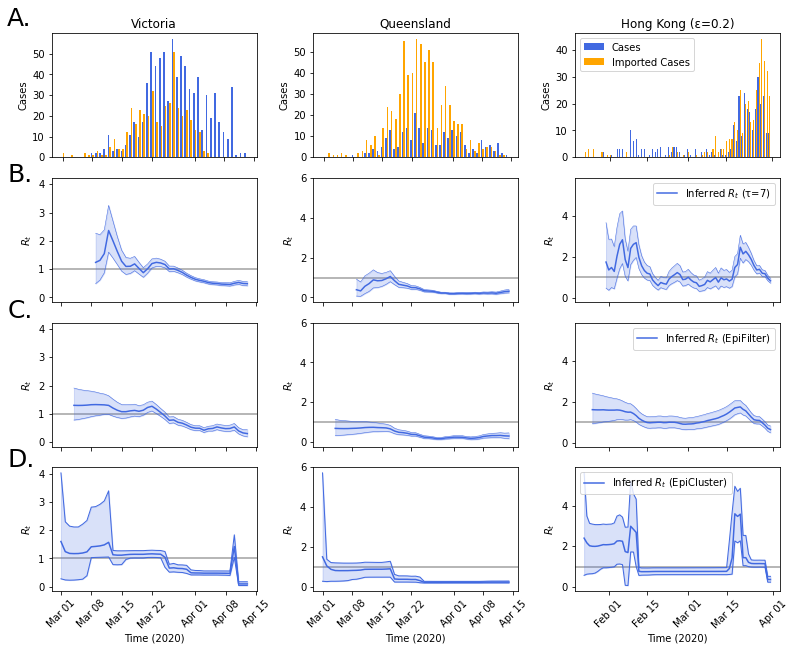

In [8]:
fig = plt.figure(figsize=(11,9))

num_exps = 3


for i in range(num_exps):
    
    do_legend = i==num_exps-1
    
    if i == 0:
        cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results = results_vic
        date0 = (2020, 3, 1)
        
    elif i == 1:
        cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results = results_qld
        date0 = (2020, 3, 1)
        
    elif i == 2:
        cases, imp_cases, w, phi_chain, z_chain, intervals7, intervals0, epi_results = results_hk
        date0 = (2020, 1, 23)
        
        
    ax = fig.add_subplot(4, num_exps, 1+i)
    
    ax.set_title(['Victoria', 'Queensland', 'Hong Kong (ε=0.2)'][i])

    x = np.arange(len(cases))
    x_dates = [datetime.datetime(*date0)]
    for xi in x[1:]:
        x_dates.append(x_dates[0] + datetime.timedelta(int(xi)))
    x = x_dates
    
    cases_x = [d - datetime.timedelta(0.2) for d in x]
    imp_x = [d + datetime.timedelta(0.2) for d in x]
    
    ax.bar(cases_x, cases, width=0.4, label='Cases', color='royalblue')
    ax.bar(imp_x, imp_cases[len(w):], width=0.4, label='Imported Cases', zorder=-10, color='orange')

    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('Cases')

    ax = fig.add_subplot(4, num_exps, 3*num_exps+i+1)
    Rs = []
    num_mcmc = len(z_chain)
    for phi, z in zip(phi_chain[num_mcmc//4:], z_chain[num_mcmc//4:]):
        Rs.append([phi[zi] for zi in z])
    ax.plot(x, np.mean(Rs, axis=0), color='royalblue', label='Inferred $R_t$ (EpiCluster)')
    ax.fill_between(x, np.percentile(Rs, 5, axis=0), np.percentile(Rs, 95, axis=0), color='royalblue', alpha=0.2)
    ax.plot(x, np.percentile(Rs, 5, axis=0), color='royalblue', lw=1)
    ax.plot(x, np.percentile(Rs, 95, axis=0), color='royalblue', lw=1)   
    
    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)   
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('$R_t$')

    ax = fig.add_subplot(4, num_exps, num_exps+i+1, sharey=ax, sharex=ax)
    x_old = copy.deepcopy(x)
    x = x[8:]

    ax.plot(x, intervals7['Mean'], color='royalblue', label='Inferred $R_t$ (τ=7)')
    ax.fill_between(x, intervals7['Lower bound CI'], intervals7['Upper bound CI'], alpha=0.2, color='royalblue')
    ax.plot(x, intervals7['Lower bound CI'], color='royalblue', lw=0.5)
    ax.plot(x, intervals7['Upper bound CI'], color='royalblue', lw=0.5)

    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)  
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('$R_t$')
    

    ax = fig.add_subplot(4, num_exps, 2*num_exps+i+1, sharey=ax, sharex=ax)

    x = x_old[3:]
    mean = epi_results['R_smooth'][1:]
    lb = epi_results['R_smooth_lower_bound'][1:]
    ub = epi_results['R_smooth_upper_bound'][1:]
    ax.plot(x, mean, color='royalblue', label='Inferred $R_t$ (EpiFilter)')
    ax.fill_between(x, lb, ub, alpha=0.2, color='royalblue')
    ax.plot(x, lb, color='royalblue', lw=0.5)
    ax.plot(x, ub, color='royalblue', lw=0.5)  

    ax.axhline(1, color='gray', alpha=0.75, zorder=-10)
    if do_legend:
        ax.legend()
    ax.set_xlabel('Time (2020)')
    ax.set_ylabel('$R_t$')
      
    
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    plt.xticks(rotation=45, ha='center')
    fig.autofmt_xdate(rotation=45, ha='center')

fig.set_tight_layout(True)

plt.subplots_adjust(left=0.2)
fig.text(.0, .97, 'A.', fontsize=25)
fig.text(.0, .73, 'B.', fontsize=25)
fig.text(.0, .52, 'C.', fontsize=25)
fig.text(.0, .29, 'D.', fontsize=25)

plt.savefig('../notebooks/Figure5.pdf')
plt.show()
